# AI2S Deep Learning Day
## Introduction to PyTorch

PyTorch is a Python library offering extensive support for the construction of deep Neural Networks (NNs).

The main capabilities of PyTorch are:
* the `Tensor` class: tensors are basically `N`-dimensional matrices. They extend the notion of matrix by adding additional dimensions to them. For instance, a 3-dimensional tensor can be thought of as an array of matrices all of the same size. The `Tensor` class in PyTorch supports auto-differentiation and is hence particularly useful for Machine Learning (ML) applications;
* a large number of built-in modules for the creation of NNs: layers, loss and performance functions, optimizers...

Along with PyTorch, we'll be using `torchvision`, which is an additional library supporting PyTorch for Computer Vision (CV) tasks.

### Installing Python and PyTorch

On Google Colab, all the libraries needed for the execution of this notebook are pre-installed.

We recommend running this notebook on your local machine only for advanced users.

## Handwritten digit recognition (MNIST dataset)

In this notebook, we'll train a simple fully-connected NN for handwritten digit recognition on the MNIST dataset. 
Despite this task being simple and *cliché*, we hope to provide you with extensive instructions explaining in detail what each and every line of code does.

**Good work!**

Alessio Ansuini, AREA Research and Technology

Andrea Gasparin and Marco Zullich, Artificial Intelligence Student Society

### Importing the libraries

All Python code starts with importing the due libraries.

Despite it's not properly compulsory to import the libraries at the beginning of the script, it's good norm to do it for code readability.

The libraries we'll necessitate are:
* `torch`: the main module for PyTorch
* `torchvision`: to provide support with MNIST
* `matplotlib`: the classical Python library for plotting

In [1]:
import numpy as np
import torch
'''
we may want to import specific modules from torch, e.g. nn (support for NNs).
By doing this, we will be able to write things like `nn.Linear` instead of
typing `torch.nn.Linear` every time.
'''
from torch import nn
import torchvision
import matplotlib.pyplot as plt

#### Quick tour into `torch.Tensor`

This part is **optional**, if you wish to jump immediately into action, feel free to just skip it

`Tensor` is a powerful class for representing data and parameters structures.

Here we offer a quick view of how to work with them.

In [2]:
# Create a 3x4 matrix/Tensor
A = torch.Tensor([
                  [1,2,3,4],
                  [5,6,8,7],
                  [0,1,2,3]
                 ])

print("3x4 tensor:\n", A,"\n")

# You can get the shape of any tensor via tensor.shape or tensor.zize()

print("Size of A:", A.size(),"\n")

# Create a 3-dim tensor of ones: torch.ones(list of the dimensions)

B = torch.ones([2,2,4])

print("B is a vector of two 2x4 matrices:\n", B,"\n")

# Create a 3x3 random matrix, element from 0 to 1

C = torch.rand([3,3])

print("C is a random 3x3 matrix:\n", C, "\n")

3x4 tensor:
 tensor([[1., 2., 3., 4.],
        [5., 6., 8., 7.],
        [0., 1., 2., 3.]]) 

Size of A: torch.Size([3, 4]) 

B is a vector of two 2x4 matrices:
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) 

C is a random 3x3 matrix:
 tensor([[0.6892, 0.7814, 0.9522],
        [0.2501, 0.5889, 0.6872],
        [0.8952, 0.7166, 0.0604]]) 



In [3]:
# We can slice (subset) a tensor by acting directly on their dimensions

print("Element of A at position (1,2):", A[1,2])

# If we have a tensor which is a single scalar, we can enucleate it via .item()

print("Scalar representation:", A[1,2].item(), "\n")

# We can also extract rows/columns from matrices

print("Second row of A:", A[1])
print("First column of A:", A[:,0], "\n")
# The [:,0] means we're selecting ALL of the rows and the column w/ index 0

# We can also modify elements this way

B[0,0,0] = 4
B[1,1,2] = 7
B[0,0,2] = 10
B[0,1,3] = 45
print("New B:\n", B, "\n")

# Similarly, we can extract matrices from 3D tensors

print("First dimension of B:\n", B[0], "\nIt's the first 2x4 matrix.\n")

# And we can do more complicated stuff

print(B[:,1], "\nThat'd be the second rows of both of B's matrices.\n")

# And we can select ranges via ":"

print("Top-left 2x2 matrix within C:\n", C[0:2,0:2])
print("It can be done also via C[:2,:2], omitting the zeros:\n", C[:2,:2], "\n")

# We can also use negative indices to refer to indices in reverse ordering

print("Last row of C:\n", C[-1],"\n")

# We can use it in ranges as well

print("First two rows of C using negative range:\n", C[-3:-1], "\n")

# Finally, we can use the ":" notations for slicing FROM a given element to the last

print("Can you recognize what B[:,:,1:] is? :)\n", B[:,:,1:])

Element of A at position (1,2): tensor(8.)
Scalar representation: 8.0 

Second row of A: tensor([5., 6., 8., 7.])
First column of A: tensor([1., 5., 0.]) 

New B:
 tensor([[[ 4.,  1., 10.,  1.],
         [ 1.,  1.,  1., 45.]],

        [[ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  7.,  1.]]]) 

First dimension of B:
 tensor([[ 4.,  1., 10.,  1.],
        [ 1.,  1.,  1., 45.]]) 
It's the first 2x4 matrix.

tensor([[ 1.,  1.,  1., 45.],
        [ 1.,  1.,  7.,  1.]]) 
That'd be the second rows of both of B's matrices.

Top-left 2x2 matrix within C:
 tensor([[0.6892, 0.7814],
        [0.2501, 0.5889]])
It can be done also via C[:2,:2], omitting the zeros:
 tensor([[0.6892, 0.7814],
        [0.2501, 0.5889]]) 

Last row of C:
 tensor([0.8952, 0.7166, 0.0604]) 

First two rows of C using negative range:
 tensor([[0.6892, 0.7814, 0.9522],
        [0.2501, 0.5889, 0.6872]]) 

Can you recognize what B[:,:,1:] is? :)
 tensor([[[ 1., 10.,  1.],
         [ 1.,  1., 45.]],

        [[ 1.,  1.,  1.],

In [4]:
# A quick note on tensors operations

# Scalar multiplication

print("A*2:\n", A*2, "\n")

# Matrix multiplication (use "@")

print("A^T * C:\n", A.t()@C, "\n")

# Sum of elements

print("Sum of B:", B.sum().item(), "\n")

# Flatten a matrix or tensor into an array

print("C flattened:", C.flatten())

# There're many more built-in methods, we encourage you to explore them :)


A*2:
 tensor([[ 2.,  4.,  6.,  8.],
        [10., 12., 16., 14.],
        [ 0.,  2.,  4.,  6.]]) 

A^T * C:
 tensor([[1.9395, 3.7258, 4.3884],
        [3.7739, 5.8127, 6.0883],
        [5.8584, 8.4884, 8.4753],
        [7.1927, 9.3975, 8.8007]]) 

Sum of B: 78.0 

C flattened: tensor([0.6892, 0.7814, 0.9522, 0.2501, 0.5889, 0.6872, 0.8952, 0.7166, 0.0604])


### Downloading the dataset

As said before, `torchvision` can handle automatically the download of many datasets for CV, `MNIST` being one of them.

#### Data preprocessing

Before downloading the datasets, we must first set up a pipeline for data preparation: this can be done via `torchvision.transforms.Compose`, which lets us create an array of functions specifying a process through which every image of the dataset will go through.

In our example, we'll be doing two specific operations on the images:
1. Transforming the image to tensors: all the data being fed to PyTorch models must be in `Tensor` form. The `torchvision.transforms.ToTensor()` lets us easily convert images to `Tensor`s.
2. Normalizing the dataset s.t. each piece of data (in our case, each image) has mean 0 and variance 1. This is not a compulsory operation, but it's recommended before training ML models. More [here](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d).

#### Data download

After establishing a preprocessing pipeline, we can start downloading the data.

The MNIST dataset can be downloaded in two lines of code (one for the training set, the other for the test set), as seen in the cell below. `root` specifies where our data will be downloaded (or searched for, if already downloaded), the `train` switch is used to download the training or the test dataset.


In [5]:
transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ])
trainset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
testset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

### Separating the images from the labels

Since MNIST is a thought for supervised ML, the dataset is composed of two entities:
* the images, contained in `trainset.data` or `testset.data`: they're decoded as tensors of shape 28x28, this being the height and width dimension. MNIST is a set of black/white images; usually, color images are decoded as 3x`h`x`w` tensors: 3 is the number of channels (Red+Green+Blue), `h` and `w` are the height and width of the images, basically, an array of three matrices;
* the labels, contained in `trainset.targets` or `testset.targets`: these indicate the true class (i.e., the handwritten number) to which each image belong.



In [6]:
train_imgs = trainset.data
train_labels = trainset.targets
test_imgs = testset.data
test_labels = testset.targets

5

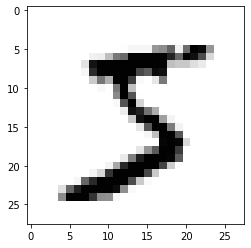

In [7]:
# We can visualize our data
first_img = train_imgs[0]
plt.imshow(first_img, cmap="Greys")
# and get the true class of the image
# note that the `item()` is used to get the scalar value out of the Tensor
train_labels[0].item()

### Creating the NN

We create the NN as in the image below:
* the **input layer** has 784 neurons: we need to *flatten* each image in a vector in order to pass it through the fully-connected NN, which does not allow for *n*-dimensional shaped input. Since images in MNIST have size 28x28, that means we'll need 784 neurons to pass them as input to the NN;
* there're three **hidden layers**: the first one has 16 neurons, the second one has 32, the first one has 16 again;
* the **output layer** has 10 neurons, one per class.

The NN can be easily created using the `torch.nn.Sequential` method, which allows for the construction of the NN by pipelining the building blocks in a list and passing it to the Sequential constructor.

`nn.Sequential` objects automatically build the `forward` and `backward` methods (needed for the forward and backward pass respectively) from their building blocks (which are built-in PyTorch objects already having pre-defined `forward` and `backward` methods) by composing them.

We pass to Sequential the following elements:
* we start with a `Flatten()` module since we need to flatten the 2D images into a 1D array
* we alternate `Linear` layers (fully-connected layers) with `ReLU` modules (Rectified Linear Unit) activation functions
* we conclude with a `Linear` layer without activation function: this will output, for each image, an array of 10 scalars, each one indicating the "confidence" that the network has in assigning the input image to the corresponding class. We'll assign the image to the class having the highest confidence.

After this, the architecture of the NN is complete! We will then focus on telling Python how to train this NN.


In [8]:
inputDimension = first_img.size(0) * first_img.size(1)
outputDimension = 10 # the number of classes - 10 digits from 0 to 9
layersWidth = 16 


network = nn.Sequential(
    nn.Flatten(),
    nn.Linear(inputDimension, layersWidth),
    nn.ReLU(),
    nn.Linear(layersWidth, layersWidth*2),
    nn.ReLU(),
    nn.Linear(layersWidth*2, layersWidth),
    nn.ReLU(),
    nn.Linear(layersWidth, outputDimension),
)


### NN training

We'll use vanilla mini-batch Stochastic Gradient Descent (SGD) with a learning rate of ... as the optimizer.

We'll create mini-batches of size 100 (i.e., we'll have 60000/100=600 mini-batches containing our data) for the training.

We'll train the NN for 10 epochs, each epoch indicating how many times the NN "sees" the whole dataset during training.

The loss function we'll use is the **categorical cross-entropy** (particularly useful for non-binary classification problems) and we'll also evaluate the network on its **accuracy** (i.e., images correctly classified divided by total images).

In [9]:
#hyper parameters

batchSize = 100
learningRate = 0.1
epochs = 10

In [10]:
optimizer = torch.optim.SGD(network.parameters(), lr=learningRate)

In order to pass our data to the network, we'll make use of DataLoaders: they take care of subdividing the dataset into mini-batches, applying the requested transformations, and optionally re-shuffling them at the beginning of each new epoch.

In [11]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

In [12]:
'''
To flatten the images we use the reshape method of tensors.
It requires as arguments the new dimensions of the tensor.
Of course, the number of elements before and after must remain the same.
For instance, a 2x5x7 tensor can be reshaped into a 7x10 tensor, while
it can't be reshaped into a 2x6x3 tensor.

We also convert the resulting tensor from integer to float since PyTorch NNs
require floats as inputs.
'''
train_imgs_flat = train_imgs.reshape(train_imgs.size(0), train_imgs.size(1)*train_imgs.size(2)).float()
test_imgs_flat = test_imgs.view(test_imgs.size(0), test_imgs.size(1)*test_imgs.size(2)).float()
# Just a quick check that the shape of the tensor is correct
train_imgs_flat.shape

torch.Size([60000, 784])

In [13]:
torch.Tensor([[1,2,3,4,5,1],[4,1,1,1,1,1]]).topk(1).indices
train_labels[:2]

tensor([5, 0])

Before training, we still need to define the performance function, the accuracy.

We define it by comparing the output of the NN for a given batch of data with the ground truth.

Since the output of the NN for how we built it is not the class, but a vector proportional to the probability that the given image will be assigned to each class, we first need to obtain the class prediction for each image in the batch.

In practical terms: if we have an image whose NN output is a Tensor with values 0.15, 0.82, 3.01, 0.01, it means that we'll assign this image to the third class.

This can be quickly carried out on PyTorch via the tensor method `topk`, which lets us select the top *k* predictions of the NN for each observation/image.

`topk` returns an object with two items: the elements in the top *k* positions and the indices of these elements. We're interested only in the indices, which are the classes to which the images are assigned by the NN.
We need to `flatten` the corresponding tensor since it comes in the form of a column vector, while we need a "classic" array.

To match the class predictions with the ground truth we simply code `class_prediction == ground_truth`. This will return an array of booleans stating, for each element, whether the image was classified correctly (in case the element will be `True`) or incorrectly (`False`).

To get the accuracy, we'll just need to sum the elements of this array (`True` will be converted to 1, `False` to 0) and divide the corresponding number by the number of elements in the batch.

In [14]:
def calculate_accuracy(nn_output, ground_truth):
    # get the NN classification for each image in the batch
    class_prediction = nn_output.topk(1).indices.flatten()
    # match with the corresponding ground truth
    match = (class_prediction == ground_truth)
    # get number of correctly classified observations. 
    # item() is used to get the scalar out of the resulting tensor
    correctly_classified = match.sum().item()
    # accuracy is the number of correctly classified observations divided by
    # the number of elements in the batch
    accuracy = correctly_classified / nn_output.size(0)
    # also OK: correctly_classified / ground_truth.size(0) since these two
    # tensors have the same first dimension.
    return accuracy

Let's check that it works for a fictitious batch of 4 images and 3 classes.

A NN output in this case will be a matrix of shape 4x3, each row holding the probability that the model assigns the corresponding image to the corresponding class.

We create a fake ground truth s.t. the NN assigns correctly the first 3 images: the corresponding accuracy should then be 3/4=0.75


In [15]:
fake_nn_output = torch.Tensor([
                               [1.01,0.25,3],
                               [0,0.54,1.11],
                               [3.25,0.25,0.15],
                               [2.01,3.04,2.11]
                              ])
fake_ground_truth = torch.Tensor([2,2,1,1])
calculate_accuracy(fake_nn_output, fake_ground_truth)

0.75

Before training the NN, we'll prepare two empty lists to store the values for loss and accuracy and get some integers to simplify calculations inside the training loop.

The training is operated in two **nested loops**, one for the epoch, one for the mini-batch.

Ideally, at each epoch, the training set is randomly split in mini-batches which are passed on to the NN, one for each iteration within the single epoch (mini-batch loop).
**We will not be doing this here in order to keep things simple**.

In each one of those iterations:
* we get the output of the NN for each image within the mini-batch
* we calculate the loss by matching the output with the ground truth
* we backpropagate the gradient of the loss for each NN parameter by calling `loss.backward()`
* we advance further downward in the landscape of the loss by calling `optimizer.step()`: the optimizer will take a step in the directon calculated within the mini-batch
* we also evaluate the accuracy, but this passage is optional since not strictly needed to the calculation of the loss.

In [16]:
lossValues = []
accuracy = []
lossFunction = torch.nn.CrossEntropyLoss()
N = train_imgs_flat.size(0)
num_of_batches = int(N/batchSize)

# this is important, it sets the NN in training mode, enabling the accumulation
# of gradients and some other stuff, like the application of batch normalization
# which right now we're not using.
network.train()

# MAIN LOOP: one iteration for each epoch
for e in range(epochs):
    # INNER LOOP: one for each MINI-BATCH
    for i, (imgs, ground_truth) in enumerate(trainloader): #range(num_of_batches):

      # zero-out the gradient of the NN's parameters - needed in order NOT to 
      # accumulate gradients on top of the previous epochs
      optimizer.zero_grad()

      
      predictions = network(imgs)

      loss = lossFunction(predictions, ground_truth)
      
      loss.backward()
      optimizer.step()
      
      accuracy_batch = calculate_accuracy(predictions, ground_truth)

      lossValues.append(loss.item())
      accuracy.append(accuracy_batch)
      
      # Every 200 iterations, we print the status of loss and accuracy
      if (i+1)%200 == 0:
        print(f"***Epoch {e+1} | Iteration {i+1} | Mini-batch loss {loss.item()} | Mini-batch accuracy {accuracy_batch}")

***Epoch 1 | Iteration 200 | Mini-batch loss 0.33818766474723816 | Mini-batch accuracy 0.88
***Epoch 1 | Iteration 400 | Mini-batch loss 0.2580600380897522 | Mini-batch accuracy 0.92
***Epoch 1 | Iteration 600 | Mini-batch loss 0.2764531672000885 | Mini-batch accuracy 0.91
***Epoch 2 | Iteration 200 | Mini-batch loss 0.2209852784872055 | Mini-batch accuracy 0.94
***Epoch 2 | Iteration 400 | Mini-batch loss 1.1793127059936523 | Mini-batch accuracy 0.66
***Epoch 2 | Iteration 600 | Mini-batch loss 0.8513714671134949 | Mini-batch accuracy 0.76
***Epoch 3 | Iteration 200 | Mini-batch loss 0.780179500579834 | Mini-batch accuracy 0.76
***Epoch 3 | Iteration 400 | Mini-batch loss 1.0799579620361328 | Mini-batch accuracy 0.6
***Epoch 3 | Iteration 600 | Mini-batch loss 0.3720437288284302 | Mini-batch accuracy 0.89
***Epoch 4 | Iteration 200 | Mini-batch loss 0.712603747844696 | Mini-batch accuracy 0.79
***Epoch 4 | Iteration 400 | Mini-batch loss 0.6057194471359253 | Mini-batch accuracy 0.8
**

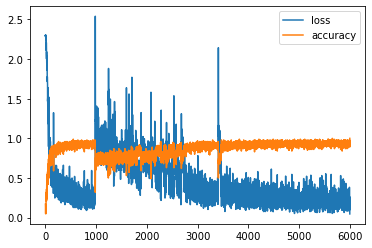

In [17]:
# Let us draw the charts for loss and accuracy for each training iteration
plt.plot(lossValues, label="loss")
plt.plot(accuracy, label="accuracy")
plt.legend()

### Testing the network

The network's testing is similar to the training phase.

The 2 main differences are:
* we'll average the loss and the accuracy through all of the mini-batch loop to produce an estimate for **all** of the test dataset
* we activate the network's `eval` mode to disable the gradient accumulation


In [18]:
# test the network
network.eval()

# MAIN LOOP: one iteration for each epoch
for e in range(epochs):
    running_loss = 0.0
    running_accuracy = 0.0
    # INNER LOOP: one for each MINI-BATCH
    for imgs, ground_truth in testloader:

      # zero-out the gradient of the NN's parameters - needed in order NOT to 
      # accumulate gradients on top of the previous epochs
      optimizer.zero_grad()

      predictions = network(imgs)

      loss = lossFunction(predictions, ground_truth)
      running_loss += loss.item()
      
      accuracy_batch = calculate_accuracy(predictions, ground_truth)
      running_accuracy += accuracy_batch*imgs.size(0)

test_loss = running_loss
test_accuracy = running_accuracy/test_imgs.size(0)
print(f"---TEST - Loss: {test_loss} | Accuracy: {test_accuracy}")

---TEST - Loss: 20.806594159570523 | Accuracy: 0.9403


### Identifying misclassified examples

We may want to identify a given number of misclassified images.

To do this, we need to loop through the test (or train) set and identify where the model has done wrong and store the corresponding image, predicted label and true label.


In [19]:
K = 6 # no. of misclassified images we wish to find

misclassified_images = torch.zeros(K, 28, 28) # here we'll put the misclassified examples
misclassified_labels = torch.zeros(K) # here we'll put the corresponding model's prediction
ground_truth_miss = torch.zeros(K) # and here the corresponding ground truth

network.eval()
k = 0 # counter for misclassified images
for imgs, ground_truth in testloader:
  class_pred = network(imgs).topk(1).indices.flatten()
  match = (class_pred != ground_truth)
  # we can slice the mini-batch by passing the match tensor as slicing condition
  # this is possible because `match` is an array of booleans 
  # this mean that, when used to slice another tensor, we'll keep only the
  # indices where `match` is true
  misclass_batch = imgs[match]
  misclass_labels_batch = class_pred[match]
  ground_truth_miss_batch = ground_truth[match]

  m = len(misclass_batch)
  if m + k >= K:
    # there're more misclassified images in the batch than the ones we want
    # -> we need to slice the misclassified images
    misclassified_images[k:K] = misclass_batch[:K-k].reshape(K - k, 28, 28)
    misclassified_labels[k:K] = misclass_labels_batch[:K-k]
    ground_truth_miss[k:K] = ground_truth_miss_batch[:K-k]
    # stop the loop
    break
  else:
    # simply add the misclassified images to the list
    misclassified_images[k:k+m] = misclass_batch.reshape(m, 28, 28)
    misclassified_labels[k:k+m] = misclass_labels_batch
    ground_truth_miss[k:k+m] = ground_truth_miss_batch
  
  k += m

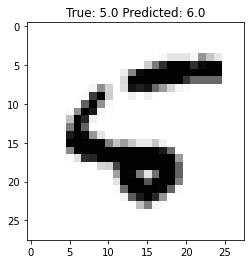

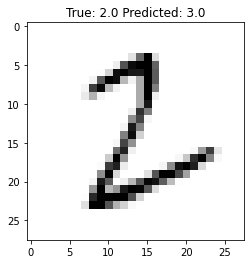

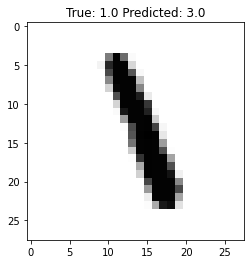

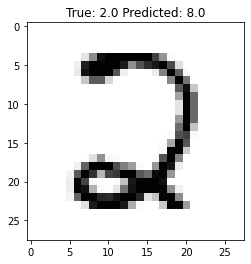

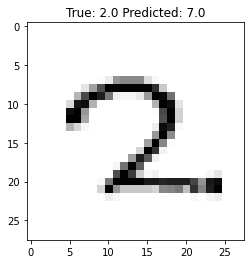

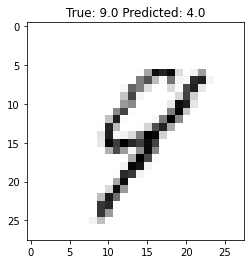

In [20]:
# we can now plot the misclassified examples
for i in range(K):
  plt.imshow(misclassified_images[i], cmap="Greys")
  plt.title(f"True: {ground_truth_miss[i]} Predicted: {misclassified_labels[i]}")
  plt.show()

## Tips for cleaner code

Usually in PyTorch we follow this convention:
* the training/testing loop for the **mini-batch** are stored inside functions (e.g. `train()` and `test()`)
* the whole epoch loop for training calls the `train()` function for each epoch
* the NN is wrapped in a class inheriting from `nn.Module`, the architecture is built within the constructor and a function `forward` is coded that specifies how the forward pass is executed (btw, the function `backward()` is automatically constructed by PyTorch, on the other hand). An example for that is shown in the next cell

In [21]:
class MyNetwork(nn.Module):

  def __init__(self, inputDimension, layersWidth, outputDimension):
    # call nn.Module's constructor
    super().__init__()

    # initialize network's architecture as class object
    self.network = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(inputDimension, layersWidth),
                    nn.ReLU(),
                    nn.Linear(layersWidth, layersWidth*2),
                    nn.ReLU(),
                    nn.Linear(layersWidth*2, layersWidth),
                    nn.ReLU(),
                    nn.Linear(layersWidth, outputDimension),
                  )
    
  def forward(self, X):
    # to execute the forward pass, just pass the input X to the network module
    return self.network(X)

## More complex stuff

There might be some advanced pieces to fit in our NN that could greatly improve performance.

### Optimizers

More advanced optimizers:
* SGD with momentum (allow for smoother trajectory of the optimizer in the loss valley): just add the keywork `momentum` to the constructor of `SGD`. Good values are usually 0.9 or 0.99.
* AdaM (a more complex optimizer that *should* adapt the learning rate as we proceed with the training): use `torch.optim.Adam(...)`. Sometimes it works better than SGD with momentum.

### Regularization

It is recommended to add a regularization term to the NNs. This is a penalty which is added to the loss and avoids the inflation of weights in order to keep the network from overfitting. The most employed regularization used is the L2-norm regolarization, which in Deep Learning is more often called **weight decay**. In PyTorch you can add it to the optimizer by means the keyword `weight_decay` in the optimizer constructor.

Additional regularization can be obtained by means the **normalization layers**. A common choice is the batch regularization, which can be operated via the `torch.nn.BatchNorm1d` module, to add after any `Linear` layer one might want to. There exist many types of normalization layers, for more info please check [this page](https://atcold.github.io/pytorch-Deep-Learning/en/week05/05-2/).

### Dropout

Dropout randomly removes some neurons from a layer during the forward pass when training. It has been shown to aid generalization. You can add it via the module `torch.nn.Dropout(p)` where `p` is the probability that each single neuron is dropped. It must be added after the activation function and the possible batch norm module.

## Architecture

When working with images, **Convolutional Neural Networks (CNNs)** have shown to perform much better than fully-connected ones for a variety of reasons, one being that they support 3D structured input like images (color channels + spatial dimensions) and are able to recognize low-level features (corners, orientation, color) in ways which resemble what our brain does during low-level vision. Our tutorial will not cover CNNs, although you can find plenty of resources online to build one.

Mainly, you need to use two building blocks:
* the `torch.nn.Conv2d` module
* the `torch.nn.MaxPool2d` module

Below you can find a sample structure for a CNN. If you feel adventurous, try using it by fitting the pieces together :)

Remember to modify your training and test set in order to add an extra dimension at the start, since PyTorch will expect a 4D matrix of shape Nx1x28x28 as input of the tensor, where N is the size of the batch/dataset. This can be achieved by calling `train_imgs.reshape(N, 1, 28, 28)`. Then remember to reload the Dataloaders.



In [22]:
class MyCNN(nn.Module):
  def __init__(self, outputDimension=10):
    # call nn.Module's constructor
    super().__init__()

    # initialize network's architecture as class object
    self.features = nn.Sequential(
                    nn.Conv2d(1, 5, kernel_size=3, padding=1),
                    nn.BatchNorm2d(5),
                    nn.ReLU(),
                    nn.Conv2d(5, 5, kernel_size=3, padding=1),
                    nn.BatchNorm2d(5),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),

                    nn.Conv2d(5, 5*2, kernel_size=3, padding=1),
                    nn.BatchNorm2d(5*2),
                    nn.ReLU(),
                    nn.Conv2d(5*2, 5*2, kernel_size=3, padding=1),
                    nn.BatchNorm2d(5*2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                  )
    
    self.classifier = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(in_features=980, out_features=10) 
                  )
    
  def forward(self, X):
    X = self.features(X)
    X = self.classifier(X)
    return X  